### 解微分方程 | Solving a differential equation

常微分方程（ordinary differential equation，ODE）：
$$
\frac{\partial f}{\partial x} = - \frac{f(x)}{x}
$$
- $f$ takes only one input $x$

> Solving an ODE means finding a function $f$ which satisfies the differential equation.

Solution: $f(x) = \frac{C}{x}$

To find a particular solution, additional constraints are needed, such as imposing the solution to go through a predefined point.<br>
Such constraints are called **initial conditions**.

Example: If set the initial condition to be $(x_0, y_0) = (2, 1)$, then this implies that $C = 2$ and the particular solution is $f(x) = \frac{2}{x}$



#### 三种方法解微分方程 | Three main approaches to solve a differential equation

1. 求解析解 | Finding an analytical solution （困难，通常不存在）
2. 寻找解析近似解 | Looking for an analytical approximation （非常困难，近似误差难以评估）
3. 计算数值近似解 | Compute a numerical approximation （适用于任何微分方程，易于实现和分析）


---

## 1. 有限差分 | Finite difference


### 前向差分格式 | Forward-difference scheme

By approximating the first-order derivative $\frac{\partial f}{\partial x}$ by the forward-difference approximation $\frac{f(x + \Delta_x) - f(x)}{\Delta_x}$ with constant mesh size $0 < \Delta_x \ll |x|$, we can approximate the differential equation by

$$
\frac{\partial f}{\partial x} = -\frac{f(x)}{x} \quad \implies \quad \frac{f(x + \Delta_x) - f(x)}{\Delta_x} = -\frac{f(x)}{x}
$$
From where we get: “步进公式”
$$
f(x + \Delta_x) = f(x)\left( 1 - \frac{\Delta_x}{x} \right)
$$

> 如果你知道当前点 $x$ 的解 $f(x)$，你就可以估算出在下一个点 $x + Δx$ 的解 $f(x + Δx)$ 应该是多少。

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

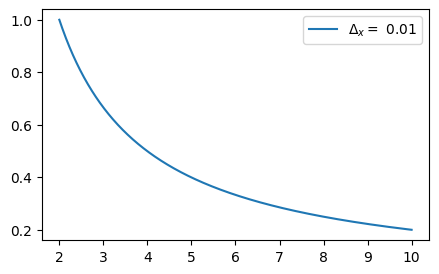

In [21]:
def FORWARD_NUMERICAL(x0, xN, N, init, showplot = True):
    """
    x0, xN, N
    """
    x = np.linspace(x0, xN, N)

    dx = x[1] - x[0]                    # 步长 Δx = 0.01
    fx = np.zeros_like(x)
    fx[0] = init                        # 初始条件: f(2.0) = 1.0

    for (i, xi) in enumerate(x[:-1]):   # 前向迭代计算
        fx[i + 1] = fx[i] * (1.0 - dx / xi)

    if showplot:
        plt.figure(figsize = (5, 3))
        sns.lineplot(x = x, y = fx, label = f"$\\Delta_x = $ {dx.round(2)}")    # 这条折线，就是我们追求的微分方程数值解的图像。
    
    return x, fx

x, fx = FORWARD_NUMERICAL(2.0, 10.0, 801, 1.0)

> 使用前向欧拉方法数值求解了一个一阶线性微分方程，通过离散化将连续的微分问题转化为离散的代数递推问题，最终获得了在区间 $[2, 10]$ 上的数值解。<br>

获得微分方程 $\frac{\partial f}{\partial x} = -\frac{f(x)}{x}$ 在区间 $[2, 10]$ 上，满足初始条件 $f(2) = 1$ 的解函数 f(x) 的图像。

- 对于数值方法，“解”不是一个公式，而是解曲线上一系列离散的数据点。

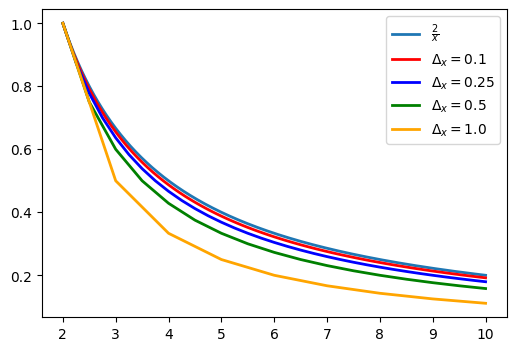

In [22]:
def FORWARD_NUMERICAL_MULTIPLE_MESH():
    x0, xN = 2.0, 10.0

    plt.figure(figsize = (6, 4))

    # 解析解
    x_analytical = np.linspace(x0, xN, 1000)
    f_analytical = 2.0 / x_analytical
    sns.lineplot(x = x_analytical, y = f_analytical, linewidth = 2, label = "$\\frac{2}{x}$")

    # 数值解
    step_sizes = [0.10, 0.25, 0.50, 1.00]
    colors = ["red", "blue", "green", "orange"]

    for step_size, color in zip(step_sizes, colors):

        N = int((xN - x0) / step_size) + 1
        x, fx = FORWARD_NUMERICAL(x0, xN, N, 1.0, False)

        sns.lineplot(x = x, y = fx, color = color, linewidth = 2, label = f"$\\Delta_x = ${step_size}")

FORWARD_NUMERICAL_MULTIPLE_MESH()

这里需要注意的是，也不是说步长越小越好，小到一定程度就会有不可忽略的浮点误差。

On the one hand, the smaller the mesh size $\Delta_x$, the closer the approximation to the true solution.
- This is because the trunction error of the approximation of the first-order derivative is proportional to $\Delta_x$

On the other hand, the float-rounding error cannot be neglected for small values of $\Delta_x$, which deteriorates the approximation.

> The smaller the mesh size, the more grid points and the higher the computational cost.

---

### 中心差分格式 | Centered-difference scheme

$$
\frac{\partial f}{\partial x}=-\frac{f(x)}{x} \quad \implies \quad \frac{f(x+\Delta_x)-f(x-\Delta_x)}{2\Delta_x}=-\frac{f(x)}{x}
$$
which can be rewritten as:
$$
f(x)=\frac{x}{2\Delta_x}\left(f(x-\Delta_x)-f(x+\Delta_x)\right)
$$

In order to compute the equation, one needs to know two points,
- $f(x - \Delta_x)$
- $f(x + \Delta_x)$

> Two initial conditions.

---

For $4$ successive approximation points
$$
(x_i, y_i)
$$
where $x_i = x_0 + i\times \Delta_x$, $y_i = f(x_i)$, $i = 1, 2, 3, 4$

The finite-difference equation $y_i=\frac{x_i}{2\Delta_x}\left(y_{i-1}-y_{i+1}\right)$ yields:
$$
\begin{gathered}
y_1 = \frac{1}{2\Delta_x}x_1(y_0-y_2) \\
y_2 = \frac{1}{2\Delta_x}x_2(y_1-y_3) \\
y_3 = \frac{1}{2\Delta_x}x_3(y_2-y_4) \\
y_4 = \frac{1}{2\Delta_x}x_4(y_3-y_5)
\end{gathered}
\quad\implies\quad
\begin{gathered}
y_1 + c_1y_2 = c_1y_0 \\
-c_2y_1 + y_2 + c_2y_3 = 0 \\
-c_3y_2 + y_3 + c_3y_4 = 0 \\
-c_4y_3 + y_4 = -c_4y_5
\end{gathered}
\quad\quad c_i = \frac{x_i}{2\Delta_x}
$$

Rewrite it as the following linear system:

$$
\begin{bmatrix}
1 & c_{1} \\
-c_{2} & 1 & c_{2} \\
& -c_{3} & 1 & c_{3} \\
& & -c_{4} & 1
\end{bmatrix}
\begin{bmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4}
\end{bmatrix} = 
\begin{bmatrix}
c_{1}y_{0} \\ 
0 \\
0 \\
-c_{4}y_{5}
\end{bmatrix}
$$

> This can be solve if we know the two intial conditions $\color{red}y_0$ and $\color{red}y_5$.

---

从初值问题 → 边值问题

- 前向差分：是"前进式"的，从已知点出发，一步一步向前计算（初值问题）
- 中心差分：是"全局式"的，需要同时确定所有点的值（边值问题）

1. 同时求解：中心差分方法需要一次性求解所有未知数，而不是逐步推进
2. 边界条件至关重要：没有合适的边界条件，系统是不封闭的（需要两个边界条件）

本质：
将微分方程转化为一个大型线性代数系统，通过边界条件封闭该系统，然后使用高效的矩阵求解器一次性得到整个区间上的数值解。

> 更高的精度和更好的数值稳定性

---


In [23]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

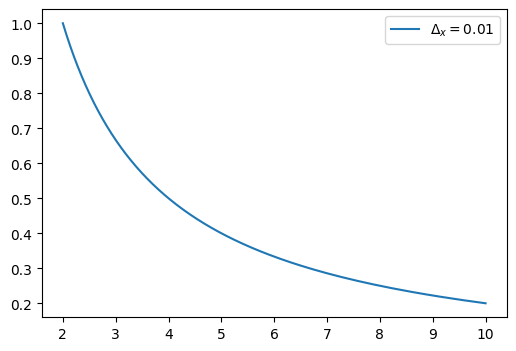

In [25]:
def CENTERED_NUMERICAL(x0, xN, N, showplot = True):
    """
    x0, xN, N 
    """
    # 选择步长
    x = np.linspace(x0, xN, N)
    dx = x[1] - x[0]

    # 中间方程（未知）
    upper_diag = x[:-1] / (2.0 * dx)
    diag = np.ones_like(x)
    lower_diag = -x[1:] / (2.0 * dx)

    diagonals = [lower_diag, diag, upper_diag]

    # 利用中间方程，构造矩阵
    A = diags(diagonals, [-1, 0, 1])
    b = np.zeros_like(x)

    # 边界条件（已知）
    b[0] = x[0] / (2.0 * dx) * 2.0 / (x0 - dx)
    b[-1] = -x[-1] / (2.0 * dx) * 2.0 / (xN + dx)

    # fx = np.linalg.solve(A.toarray(), b)  # 计算复杂度 O(n^3)
    fx = spsolve(A.tocsr(), b)  # 计算复杂度 O(n) 到 O(n^2)

    if showplot:
        plt.figure(figsize = (6, 4))
        sns.lineplot(x = x, y = fx, label = f"$\\Delta_x = ${dx:.2f}")
        
    return x, fx

x, fx = CENTERED_NUMERICAL(x0 = 2.0, xN = 10.0, N = 801)

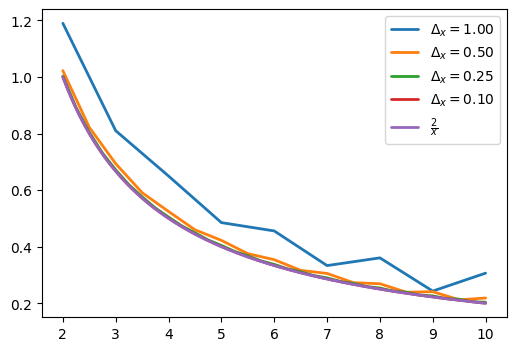

In [26]:
def CENTERED_NUMERCAL_MULTIPLE_MESH():
    x0, xN = 2.0, 10.0

    plt.figure(figsize = (6, 4))

    step_sizes = [1.00, 0.50, 0.25, 0.10]

    for step_size in step_sizes:

        N = int((xN - x0) / step_size) + 1
        x, fx = CENTERED_NUMERICAL(x0, xN, N, False)

        sns.lineplot(x = x, y = fx, solid_capstyle = "round", linewidth = 2, label = f"$\\Delta_x = ${step_size:.2f}")

    x_analytical = np.linspace(x0, xN, 1000)
    f_analytical = 2.0 / x_analytical
    sns.lineplot(x = x_analytical, y = f_analytical, solid_capstyle = "round", linewidth = 2, label = "$\\frac{2}{x}$")

CENTERED_NUMERCAL_MULTIPLE_MESH()

---

## 2. 微分方程的分类 | Classification of differential equations

- $u$ - A function of several variables.

> e.g., $u(t, x)$, $u(x, y)$, $u(t, x, y)$

- $t$ - Time variable
- $x, y$ - Space variable

Notation for partial derivatives:
$$
u_t:=\frac{\partial u}{\partial t} \quad u_x:=\frac{\partial u}{\partial x} \quad u_y:=\frac{\partial u}{\partial y} \\
u_{tt}:=\frac{\partial^2u}{\partial t^2} \quad u_{xx}:=\frac{\partial^2u}{\partial x^2} \quad u_{yy}:=\frac{\partial^2u}{\partial y^2} \quad u_{xy}:=\frac{\partial^2u}{\partial x\partial y}
$$

$\color{yellow}\text{ODE}(\color{yellow}\text{O}\color{white}\text{rdinary }\color{yellow}\text{D}\color{white}\text{ifferential }\color{yellow}\text{E}\color{white}\text{quation})$ - Only one input variable $x$

$\color{yellow}\text{PDE}(\color{yellow}\text{P}\color{white}\text{Partial }\color{yellow}\text{D}\color{white}\text{ifferential }\color{yellow}\text{E}\color{white}\text{quation})$ - Multiple input variables $t, x, y, ...$

- Linear with constant coefficients: 
  - $u_{xx}+3u_{xy}+u_{yy}+u_x-u=e^{x-y}$

- Linear with variable coefficients: 
  - $\sin(xy)u_{xx}+3x^2u_{xy}+u_{yy}+u_x-u=0$

- Non-linear: 
  - $u_{xx}+3u_{xy}+u_{yy}+u_x^2-u=e^{x-y}$



---



Two-dimensional second-order PDE are classified based on their discriminant $\color{yellow}\Delta = B^2 - 4AC$
> 二维二阶偏微分方程基于其判别式进行分类

$$
Au_{xx} + Bu_{xy} + Cu_{yy} + Du_x + Eu_y + Fu + G = 0
$$

1. 双曲型方程 | Hyperbolic PDE
    - $\Delta > 0$
    - 时间演化过程 | temporal process —— 描述波动、传播现象
    - Wave equation: $u_{xx} - u_{tt} = 0$

2. 抛物线型方程 | Parabolic PDE
    - $\Delta = 0$
    - 时间传播过程 | temporal propagation process —— 描述扩散、耗散过程
    - Heat equation: $u_t - u_{xx} = 0$
    - $\color{yellow}\text{热传导、物质扩散、金融中的Black-Scholes方程}$

3. 椭圆型方程 | Elliptic PDE
    - $\Delta < 0$
    - 平衡系统 | equilibrium system —— 描述平衡态、稳态问题
    - Laplace equation: $u_{xx} + u_{yy} = 0$


---

Three components for a PDE problem:

1. The partial differential equation 
   - 游戏规则
2. Spatial (空间域) and time (时间域) domains in which the PDE has to hold 
   - 场地范围
3. Initial condition (at time $0$), Boundary conditions (spatial domain) 
   - 开始状态，场地边界规则

---

### Black-Scholes PDE

$$V_t + \frac12 \sigma^2 S^2 V_{SS} + (r - q)SV_S - rV = 0$$

- $V = V(t,S)$ - Option price
- $S$ - Underlying asset price
- $\sigma$ - Volatility of underlying asset price
- $r$ - Risk-free interest rate
- $q$ - dividend yield

> Linear with variable coefficients<br>
> First-order in time $t$; Second-order in space $S$<br>
> Parabolic PDE with $b = c = 0$

---

The initial condition (in time) is actually a terminal condition (backward PDE)

Terminal conditions (终端条件) and boundary conditions (边界条件) for European call option:
$$
\begin{aligned}
V(T,S) & = (S - K)_+ \\
V(t, 0) & = 0 \\
\lim_{S\to\infin} V(t, S) & = S - Ke^{-r(T-t)}
\end{aligned}
$$
- $K$ - Strike price (defined by the European call option contract)
- Terminal conditions - 在时间维度的终点（到期日）的状态。

Terminal conditions and boundary conditions for European put option:
$$
\begin{aligned}
V(T,S) & = (K - S)_+ \\
V(t, 0) & = Ke^{-r(T-t)} \\
\lim_{S\to\infin} V(t, S) & = 0
\end{aligned}
$$



---

## 3. Black-Scholes 偏微分方程 | Black-Scholes partial differential equationi

Why PDEs in finance?

If a real-valued stochastic process $X$ satisfies the stochastic differential equation: 
$$
dX_t = bX_tdt + \sigma X_tdW_t
$$
- $d$ - Constant drift
- $\sigma$ - Volatility
- $W$ - Standard Brownian motion

> $X$ is a Geometric Brownian motion

The value function:
$$
V(t,x)=\mathbb{E}{\left[\left.\int_t^Te^{-r(s-t)}f(s,X_s)ds+e^{-r(T-t)}g(X_T)\right|X_t=x\right]}
$$
- $V(t, x)$ - Solution of the Black-Scholes PDE

---

Particular case of the $\color{yellow}\text{Feynman-Kac formula, 费曼-卡茨公式}$ 
$$
\begin{aligned}
rV(t,x)-V_t(t,x)-bxV_x(t,x)-\frac{1}{2}\sigma^2x^2V_{xx}(t,x) & =f(t,x),\forall(t,x)\in[0,T)\times\mathbb{R} \\
V(T,x) & =g(x),\forall x\in\mathbb{R}
\end{aligned}
$$
- A powerful tool which links conditional expectations and partial differential equations.
- It is the reason why many financial option pricing problems can be solved by a PDE approach.

> The Black-Scholes PDE is only one particular case of the Feynman-Kac PDE with $d = 1$, $b, \sigma$ linear, $r$ constant, $f = 0$
> $g$ - Payoff of the European call/put option.

It admits a closed-form solution (解析解), however generally the Feynman-Kac PDE does not admit an explicit solution (显示解), hence the need for numerical PDE methods, 数值偏微分方法 (or Monte Carlo methods).

> Note: The PDE approach does not apply to models not built upon Brownian motions (which includes many interesting asset price models).

---

Black-Scholes PDE:
$$
V_t+\frac{1}{2}\sigma^2S^2V_{SS}+(r-q)SV_S-rV=0
$$

Which admits an explicit solution (显式解) for European calls, European puts and a few other simple options (the Black-Scholes formulas).

> Using Black-Scholes PDE to test numerical schemes for parabolic PDEs.


---

<img src="./image/european_call_option_price_3d.png" alt="image.png" style="width: 500px; height: auto; display: block; margin: 0 auto;">
<br>
<img src="./image/european_put_option_price_3d.png" alt="image.png" style="width: 500px; height: auto; display: block; margin: 0 auto;">

---

### 有限差分网格 | Finite-difference grid

- $\Delta_S = \frac{S_{\max} - S_{\min}}{M}$
- $\Delta_t = \frac{T}{N}$

The numerical approximation $v_{\color{yellow}ij}$ of $V(t, S)$ is only computed at the grid points $(t_{\color{yellow}i}, S_{\color{yellow}j})$
$$
\begin{aligned}
(t_{\color{yellow}i}, S_{\color{yellow}j}) & = ({\color{yellow}i}\Delta_t, S_{\min} + {\color{yellow}j}\Delta_S ) \\
v_{\color{yellow}ij} & \approx V({\color{yellow}i}\Delta_t, S_{\min} + {\color{yellow}j}\Delta_S)
\end{aligned}
$$

It is an equality at the terminal condition points $(T, S_{\color{yellow}j})$


<img src="./image/finite_difference_grid.png" alt="image.png" style="width: 500px; height: auto; display: block; margin: 0 auto;">

---

### 有限差分近似 | Finite-difference approximation

We approximate the partial derivatives $V_t, V_S, V_{SS}$ by,
$$
\begin{aligned}
V_t(t_{\color{yellow}i},S_j) & \approx \frac{v_{{\color{yellow}i}j}-v_{{\color{yellow}i-1},j}}{\Delta_t} \\
V_S(t_i,S_{\color{yellow}j}) & \approx \frac{v_{i,{\color{yellow}j+1}}-v_{i,{\color{yellow}j-1}}}{2\Delta_S} \\
V_{SS}(t_i,S_{\color{yellow}j}) & \approx \frac{v_{i,{\color{yellow}j+1}}-2v_{i{\color{yellow}j}}+v_{i,{\color{yellow}j-1}}}{\Delta_S^2}
\end{aligned}
$$


<img src="./image/finite_difference_approximation.png" alt="image.png" style="width: 500px; height: auto; display: block; margin: 0 auto;">

---

### 有限差分格式 | Finite-difference scheme

We replace the partial derivatives in the Black-Scholes PDE by these finite-difference approximations:

$$
{\color{yellow}V_t} + \frac{1}{2} \sigma^2 S^2 {\color{yellow}V_{SS}} + (r - q) S {\color{yellow}V_S} - r {\color{yellow}V} = 0 \\
{\color{yellow}\frac{v_{ij} - v_{i - 1,j}}{\Delta_t}} + \frac{1}{2} \sigma^2 S_j^2 {\color{yellow}\frac{v_{i,j + 1} - 2v_{ij} + v_{i,j - 1}}{\Delta_S^2}} + (r - q) S_j {\color{yellow}\frac{v_{i,j + 1} - v_{i,j - 1}}{2\Delta_S}} - r {\color{yellow}v_{ij}} = 0
$$

Define ${\color{yellow}a_j} = \frac{\Delta_t\sigma^2 S_j^2}{2\Delta_S^2}$ and ${\color{yellow}b_j} = \frac{\Delta_t(r - q)S_j}{2\Delta_S}$.

For $j = 1,...,M-1$:
$$
v_{ij} - v_{i - 1,j} + {\color{yellow}a_j} (v_{i,j + 1} - 2v_{ij} + v_{i,j - 1}) + {\color{yellow}b_j}(v_{i,j + 1} - v_{i,j - 1}) - r\Delta_tv_{ij} = 0
$$
Grouping similar terms together, we obtain:
$$
v_{ij} - v_{i - 1,j} + {\color{yellow}d_j} v_{i,j - 1} + {\color{yellow}m_j} v_{ij} + {\color{yellow}u_j} v_{i,j + 1} = 0
$$
- ${\color{yellow}d_j} := a_j - b_j$
- ${\color{yellow}m_j} := -2a_j - r\Delta_t$
- ${\color{yellow}u_j} := a_j + b_j$

The $j = 1,...,M-1$ equations at time $t_i$ are:
$$
\begin{aligned}
& v_{i, {\color{yellow}1}} & - & v_{i - 1, {\color{yellow}1}} & + & d_{\color{yellow}1} & v_{i, {\color{yellow}0}} & + & m_{\color{yellow}1} v_{i, {\color{yellow}1}} & + & u_{\color{yellow}1} v_{i, {\color{yellow}2}} & = 0 \\
\vdots \\
& v_{i, {\color{yellow}j}} & - & v_{i - 1, {\color{yellow}j}} & + & d_{\color{yellow}j} & v_{i, {\color{yellow}j - 1}} & + & m_{\color{yellow}j} v_{i, {\color{yellow}j}} & + & u_{\color{yellow}j} v_{i, {\color{yellow}j + 1}} & = 0 \\
\vdots \\
& v_{i, {\color{yellow}M - 1}} & - & v_{i - 1, {\color{yellow}M - 1}} & + & d_{\color{yellow}M - 1} & v_{i, {\color{yellow}M - 2}} & + & m_{\color{yellow}M - 1} v_{i, {\color{yellow}M - 1}} & + & u_{\color{yellow}M - 1} v_{i, {\color{yellow}M}} & = 0
\end{aligned}
$$


---

### 有限差分方程组 | System of finite-difference equation

In matrix notation, the system of equation is,
$$
\mathbf{v}_{i,1:M-1}-\mathbf{v}_{i-1,1:M-1}+\mathbf{P}\mathbf{v}_{i,0:M}=0
$$
- $(M - 1)\times(M + 1)$ matrix $\mathbb{P}$
$$
\mathbf{P} = 
\begin{bmatrix}
d_1 & m_1 & u_1 & 0 & \cdots & \cdots & 0 \\
0 & d_2 & m_2 & u_2 & & & \vdots \\
\vdots & & d_3 & \ddots & \ddots & & \vdots \\
\vdots & & & \ddots & \ddots & u_{M-2} & 0 \\
0 & \cdots & \cdots & 0 & d_{M-1} & m_{M-1} & u_{M-1}
\end{bmatrix}
$$

We can decompose the set of rows (行集) $\bar{\Omega}:=\{0,1,2,\ldots,M\}$ into the interior rows (内部行) $\Omega:=\{1,2,\ldots,M-1\}$ and the boundary rows (边界行) $\partial\Omega:=\{0,M\}$
$$
\mathbf{v}_i^{\bar{\Omega}} = 
\begin{bmatrix}
v_{i,0} \\
v_{i,1} \\
v_{i,2} \\
\vdots \\
v_{i,M-1} \\
v_{i,M}
\end{bmatrix}
\in \mathbb{R}^{M+1}, \quad\quad
\mathbf{v}_i^\Omega = 
\begin{bmatrix}
v_{i,1} \\
v_{i,2} \\
\vdots \\
v_{i,M-1} 
\end{bmatrix}
\in\mathbb{R}^{M-1}, \quad\quad
\mathbf{v}_i^{\partial\Omega} = 
\begin{bmatrix}
v_{i,0} \\
v_{i,M}
\end{bmatrix}
\in\mathbb{R}^2
$$

Matrices ${\color{red}\mathbf{A}} \in\mathbb{R}^{(M-1)\times(M-1)}$ and ${\color{blue}\mathbf{B} }\in\mathbb{R}^{(M-1)\times2}$
$$
{\color{red}\mathbf{A}} = 
\begin{bmatrix}
m_1 & u_1 & 0 & \cdots & \cdots \\
d_2 & m_2 & u_2 & & \\
& d_3 & \ddots & \ddots & \\
& & \ddots & \ddots & u_{M-2} \\
\cdots & \cdots & 0 & d_{M-1} & m_{M-1}
\end{bmatrix}
, \quad\quad
{\color{blue}\mathbf{B}} = 
\begin{bmatrix} 
d_1 & \mathbf{0} \\
0 & \vdots \\
\vdots & \vdots \\
\vdots & 0 \\
0 & u_{M-1}
\end{bmatrix}
$$
- $\mathbf{P} = \Bigg[ {\color{blue}\mathbf{B}}[:,0] \Biggm| {\color{red}\mathbf{A}} \Biggm| {\color{blue}\mathbf{B}}[:,1] \Bigg]$

$$
\mathbf{P}\mathbf{v}_i^{\bar{\Omega}} = {\color{red}\mathbf{A}} \mathbf{v}_i^\Omega + {\color{blue}\mathbf{B}} \mathbf{v}_i^{\partial\Omega}
$$


---

### 显式格式 | Explicit scheme

Previous notation:
$$
\mathbf{v}_{i,1:M-1}-\mathbf{v}_{i-1,1:M-1}+\mathbf{P}\mathbf{v}_{i,0:M}=0
$$

New notation:
$$
\mathbf{v}_i^\Omega-\mathbf{v}_{i-1}^\Omega+\mathbf{A}\mathbf{v}_i^\Omega+\mathbf{B}\mathbf{v}_i^{\partial\Omega}=0
$$

Solultion $\mathbf{v}_0^{\Omega}$ is obtained by computing:
$$
\mathbf{v}_{i-1}^\Omega=(\mathbf{I}+\mathbf{A})\mathbf{v}_i^\Omega+\mathbf{B}\mathbf{v}_i^{\partial\Omega}
$$

<img src="./image/explicit_scheme.png" alt="image.png" style="width: 200px; height: auto; display: block; margin: 0 auto;">

---

### 隐式格式 | Implicit scheme

Approximate the partial derivative $V_t$ with a $\color{yellow}\text{forward difference}$:
$$
V_t(t_{\color{yellow}i},S_j) \approx \frac{v_{{\color{yellow}i+1},j}-v_{{\color{yellow}i},j}}{\Delta_t}
$$

The numerical scheme becomes:
$$
\mathbf{v}_{\color{yellow}i+1}^\Omega-\mathbf{v}_{\color{yellow}i}^\Omega+\mathbf{A}\mathbf{v}_i^\Omega+\mathbf{B}\mathbf{v}_i^{\partial\Omega}=0
$$

Solution is obtained by solving the linear system:
$$
(\mathbf{I}-\mathbf{A})\mathbf{v}_i^\Omega=\mathbf{v}_{i+1}^\Omega+\mathbf{B}\mathbf{v}_i^{\partial\Omega}
$$
- $i = N - 1,...,1, 0$


<img src="./image/Implicit_scheme.png" alt="image.png" style="width: 200px; height: auto; display: block; margin: 0 auto;">

---

### $\theta$-method

Implicit scheme at time $t_i$:
$$
\mathbf{v}_{i+1}^\Omega-\mathbf{v}_i^\Omega+\mathbf{A}\mathbf{v}_i^\Omega+\mathbf{B}\mathbf{v}_i^{\partial\Omega}=0
$$

Explicit scheme at time $t_{i + 1}$:
$$
\mathbf{v}_{i+1}^{\Omega}-\mathbf{v}_{i}^{\Omega}+\mathbf{A}\mathbf{v}_{i+1}^{\Omega}+\mathbf{B}\mathbf{v}_{i+1}^{\partial\Omega}=0
$$

A linear combination of these two equations with ${\color{yellow}\theta}\in[0, 1]$
$$
{\color{yellow}\theta}\left(\mathbf{v}_{i + 1}^\Omega - \mathbf{v}_i^\Omega + \mathbf{A}\mathbf{v}_i^\Omega + \mathbf{B}\mathbf{v}_i^{\partial\Omega}\right) + {\color{yellow}(1 - \theta)}\left(\mathbf{v}_{i + 1}^\Omega - \mathbf{v}_i^\Omega + \mathbf{A}\mathbf{v}_{i + 1}^\Omega + \mathbf{B}\mathbf{v}_{i + 1}^{\partial\Omega}\right) = 0
$$

After rearanging the terms, we obtain,
$$
{\color{yellow}(\mathbf{I} - \theta\mathbf{A})}\mathbf{v}_i^\Omega = {\color{yellow}(\mathbf{I} + (1 - \theta)\mathbf{A})}\mathbf{v}_{i + 1}^\Omega + \theta\mathbf{B}\mathbf{v}_i^{\partial\Omega} + (1 - \theta)\mathbf{B}\mathbf{v}_{i + 1}^{\partial\Omega}
$$

Solution $\mathbb{v}_0^{\Omega}$ is obtained by solving this linear system for $i = N - 1, ..., 1, 0$

> $\theta = 0$ - Explicit scheme<br>
> $\theta = 1$ - Implicit scheme<br>
> $\theta = \frac12$ - Crank-Nicolson scheme


<img src="./image/implementation_theta_method.png" alt="image.png" style="width: 900px; height: auto; display: block; margin: 0 auto;">

---

In [ ]:
import numpy as np
from scipy.sparse import diags
from scipy.linalg import solve
from scipy import interpolate

def BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, theta):
    dt = T / N
    ds = (smax - smin) / M

    tgrid = np.linspace(0.0, T, N + 1)
    sgrid = np.linspace(smin, smax, M + 1)
    
    a = dt * sigma * sigma * sgrid * sgrid / (2 * ds * ds)
    b = dt * (r - q) * sgrid / (2.0 * ds)
    
    d = a - b
    m = - 2.0 * a - r * dt
    u = a + b
    
    A = diags([d[2:M], m[1:M], u[1:(M - 1)]], [-1, 0, 1]).toarray()
    B = np.zeros([M - 1, 2])
    B[0, 0] = d[1]
    B[-1, 1] = u[M - 1]

    Al = np.eye(M - 1) - theta * A
    Ar = np.eye(M - 1) + (1.0 - theta) * A

    V = np.zeros([N + 1, M + 1])

    # terminal condition
    V[N, :] = np.maximum(K - sgrid, 0.0)
    # boundary condition
    V[:, M] = 0.0
    # boundary condition
    V[:, 0] = K * np.exp(- r * (T - tgrid)) - smin

    Vbound = np.zeros([2, N + 1])
    Vbound[0, :] = V[:, 0]
    Vbound[1, :] = V[:, M]
    
    for i in np.arange(N - 1, -1, -1):
        Br = ((Ar @ (V[i + 1, 1:M])).squeeze() + theta * B @ (Vbound[:, i]) + (1.0 - theta) * B @ (Vbound[:, i + 1])).T
        V[i, 1:M] = np.squeeze(solve(Al, Br))

    v0 = interpolate.interp1d(sgrid, V[0, :], kind = 'cubic')  
    return v0


In [9]:
smin, smax, r, q = 0.0, 150.0, 0.10, 0.00
T, K, sigma = 5/12, 50.0, 0.4

# number of time steps
N = 1000
# number of space steps
M = 100

# explicit scheme
v0_EX = BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, 0.0)
# Crank-Nicolson scheme
v0_CN = BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, 0.5)
# implicit scheme
v0_IM = BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, 1.0)

S0 = 50.0
# print(BS_PUT(S0,K,T,r-q,sigma)) # price using Black-Scholes formula
# 4.075980984787783
print(v0_EX(S0)) # price using explicit PDE scheme
# 4.075594500192876
print(v0_CN(S0)) # price using Crank-Nicolson scheme
# 4.074951689304087
print(v0_IM(S0)) # price using implicit scheme
# 4.074308638302932


4.075594500192874
4.074951689304101
4.0743086383029326


In [10]:
smin, smax, r, q = 0.0, 150.0, 0.10, 0.00
T, K, sigma = 5/12, 50.0, 0.4

# number of time steps
N = 100
# number of space steps
M = 500

# explicit scheme
v0_EX = BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, 0.0)
# Crank-Nicolson scheme
v0_CN = BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, 0.5)
# implicit scheme
v0_IM = BS_PUT_theta_method(smin, smax, K, T, r, q, sigma, N, M, 1.0)

S0 = 50.0
# print(BS_PUT(S0,K,T,r-q,sigma)) # price using Black-Scholes formula
## 4.075980984787783
print(v0_EX(S0)) # price using explicit PDE scheme: UNSTABLE
## -2.936473467759726e+154
print(v0_CN(S0)) # price using Crank-Nicolson scheme
## 4.075957116739048
print(v0_IM(S0)) # price using implicit scheme
## 4.069519474359279


-2.936473467759729e+154
4.075957116739053
4.069519474359312


---

### PDE格式的数值稳定性 | Numerical stability of PDE schemes

The $\color{yellow}\text{explicit scheme, 显式格式}$ is simple and easy to implement, but is $\color{yellow}\text{numerically unstable, 数值不稳定}$.

In the case of the Black-scholes PDE, a $\color{yellow}\text{stability analysis}$ would reveal that it is stable if:
$$
\Large
\frac{\sigma^2 S_{\max}^2 \Delta_t}{\Delta_S^2} \le 1
$$

By contrast, the $\color{yellow}\text{implicit (隐式) and Crank-Nicolson scheme}$ are $\color{yellow}\text{unconditionally stable, 无条件稳定}$.

> More precisely, the $\theta$-method is unconditionally stable if and only if $\theta \ge 0.5$.<br>
> 更准确地说，$\theta$ 方法 当且仅当 $\theta \ge 0.5$ 时，是无条件稳定的。


---

#### 显式格式的数值稳定性 | Numerical stability of explicit scheme

In [ ]:
smin, smax, T, sigma = 0.0, 150.0, 5 / 12, 0.4

# number of time steps
N = 1000
# number of space steps
M = 100

dt, ds = T / N, (smax - smin) / M
print(sigma * sigma * smax * smax * dt / (ds * ds))

0.6666666666666667


In this example, the stability ratio $ < 1$.<br>
The explicit scheme is $\color{yellow}\text{stable}$.

In [ ]:
smin, smax, T, sigma  = 0.0, 150.0, 5/12, 0.4

# number of time steps
N = 100 
# number of space steps
M = 500 

dt, ds = T / N, (smax - smin) / M
print(sigma * sigma * smax * smax * dt / (ds * ds))

166.66666666666669


In this example, the stability ratio $ > 1$.<br>
The explicit scheme is $\color{yellow}\text{unstable}$.

---

#### Crank-Nicolson格式的数值稳定性 | Numerical stability of Crank-Nicolson scheme

The $\theta$ method is $\color{yellow}\text{unconditionally stable}$ for any $\theta \ge 0.5$, therefore, the Crank-Nicolson scheme $\theta = 0.5$ is stable.

However, the $\theta$ method is only $\color{yellow}\text{conditionally stable}$ for $\theta = 0.5 - \varepsilon$, $0 < \varepsilon \le 0.5$.

This means that, any perturbation, for example due to **float-rounding error**, could push the Crank-Nicolson scheme in the conditionally stable region, and even generate unstable oscillations if the stability condition is not satisfied.
> 这意味着，任何扰动（例如由于浮点数舍入误差）都可能将Crank-Nicolson格式推入条件稳定区域，如果稳定性条件不满足，甚至可能产生不稳定振荡。

For this reason, the Crank-Nicolson scheme is called $\color{yellow}\text{neutrally stable, 中性稳定}$.

---

#### 观察 | observations

1. The explicit scheme is unreliable (numerical instability).
2. The $\color{yellow}\text{Crank-Nicolson scheme}$ is the most accurate, and is the only one which improves when $\color{yellow}M$ grows for fixed $\color{yellow}N$.
3. Errors grow with $\color{yellow}\sigma$.
4. Errors are large at-the-money (when price $\color{yellow}S$ is close to the strike price $\color{yellow}K$).
   - This suggests using a variable space grid (可变空间网格) (finer grid (更细密的网格) around $K$)

> 可变空间网格（Variable Space Grid）:
> - 在关心区域（如平值 $K$ 附近）加密网格，而在其他区域使用较稀疏的网格，可以智能地分配计算资源。


---

## 4. 总结 | Conclusions

1. The explicit scheme is numerically unstable, and should be avoided.
    - The $\theta$ method with $\theta \ge 0.5$ is the finite-difference scheme to use in practice.
2. Performing a change of variables before applying a finite-difference scheme can greatly improves its accuracy.
    - The best choice of variable transform depends on the problem at hand.

> These two conclusions were obtained from numerical experiments with Black-scholes PDE, but these are $\color{yellow}\text{general}$ observations which $\color{yellow}\text{remain true}$ for other types of PDE.
